In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://en.wikipedia.org/wiki/Global_Peace_Index'
wiki_class = "wikitable sortable jquery-tablesorter"

response = requests.get(url)
print(response.status_code)

200


In [3]:
soup = BeautifulSoup(response.text, 'html.parser')
peace = soup.find('table', {'class':'wikitable', 'class':'sortable','style':'font-size: 90%'})

In [4]:
df = pd.read_html(str(peace))
df = pd.DataFrame(df[0])
df.head()

,Country,2021 rank,2021 score[7],2020 rank,2020 score[8],2019 rank,2019 score[9],2018 rank,2018 score[10],2017 rank,...,2011 rank,2011 score[17],2010 rank,2010 score[18],2009 rank,2009 score[19],2008 rank,2008 score[20],2007 rank,2007 score[21][22]
0,Luxembourg,—,—,—,—,—,—,—,—,—,...,—,—,7=,1.341,13,1.341,9,1.446,—,—
1,Hong Kong,—,—,—,—,—,—,—,—,—,...,—,—,—,—,—,—,23,1.608,23,1.657
2,Iceland,1,1.100,1,1.078,1,1.072,1,1.096,1,...,1,1.148,2,1.212,4,1.225,1,1.176,—,—
3,New Zealand,2,1.253,2,1.198,2,1.221,2,1.192,2,...,2,1.279,1,1.188,1,1.202,4,1.350,2,1.363
4,Denmark,3,1.256,5,1.283,5,1.316,5,1.353,5,...,4,1.289,7=,1.341,2=,1.217,2,1.333,3,1.377


In [5]:
df[df['Country']=='Saudi Arabia']

,Country,2021 rank,2021 score[7],2020 rank,2020 score[8],2019 rank,2019 score[9],2018 rank,2018 score[10],2017 rank,...,2011 rank,2011 score[17],2010 rank,2010 score[18],2009 rank,2009 score[19],2008 rank,2008 score[20],2007 rank,2007 score[21][22]
126,Saudi Arabia,125,2.376,128,2.443,129,2.409,129,2.417,133,...,101,2.192,107=,2.216,104,2.167,108,2.357,90,2.246


In [6]:
df.columns

Index(['Country', '2021 rank', '2021 score[7]', '2020 rank', '2020 score[8]',
       '2019 rank', '2019 score[9]', '2018 rank', '2018 score[10]',
       '2017 rank', '2017 score[11]', '2016 rank', '2016 score[12]',
       '2015 rank', '2015 score[13]', '2014 rank', '2014 score[14]',
       '2013 rank', '2013 score[15]', '2012 rank', '2012 score[16]',
       '2011 rank', '2011 score[17]', '2010 rank', '2010 score[18]',
       '2009 rank', '2009 score[19]', '2008 rank', '2008 score[20]',
       '2007 rank', '2007 score[21][22]'],
      dtype='object')

In [7]:
def column_name_cleaner(dataframe):
    '''
    This function takes the dataframe and drops the unwanted parts and returns the needed part
    '''
    new_columns = []
    for column in dataframe.columns:
        if len(column) > 10:
            new_columns.append(column.lower()[:10])
        else:
            new_columns.append(column.lower()[:10])
    return new_columns

In [8]:
column_list = column_name_cleaner(df)
column_list

['country',
 '2021 rank',
 '2021 score',
 '2020 rank',
 '2020 score',
 '2019 rank',
 '2019 score',
 '2018 rank',
 '2018 score',
 '2017 rank',
 '2017 score',
 '2016 rank',
 '2016 score',
 '2015 rank',
 '2015 score',
 '2014 rank',
 '2014 score',
 '2013 rank',
 '2013 score',
 '2012 rank',
 '2012 score',
 '2011 rank',
 '2011 score',
 '2010 rank',
 '2010 score',
 '2009 rank',
 '2009 score',
 '2008 rank',
 '2008 score',
 '2007 rank',
 '2007 score']

In [9]:
# Rename columns to new column list
df.columns = column_list
df.head()

,country,2021 rank,2021 score,2020 rank,2020 score,2019 rank,2019 score,2018 rank,2018 score,2017 rank,...,2011 rank,2011 score,2010 rank,2010 score,2009 rank,2009 score,2008 rank,2008 score,2007 rank,2007 score
0,Luxembourg,—,—,—,—,—,—,—,—,—,...,—,—,7=,1.341,13,1.341,9,1.446,—,—
1,Hong Kong,—,—,—,—,—,—,—,—,—,...,—,—,—,—,—,—,23,1.608,23,1.657
2,Iceland,1,1.100,1,1.078,1,1.072,1,1.096,1,...,1,1.148,2,1.212,4,1.225,1,1.176,—,—
3,New Zealand,2,1.253,2,1.198,2,1.221,2,1.192,2,...,2,1.279,1,1.188,1,1.202,4,1.350,2,1.363
4,Denmark,3,1.256,5,1.283,5,1.316,5,1.353,5,...,4,1.289,7=,1.341,2=,1.217,2,1.333,3,1.377


In [10]:
url = 'https://en.wikipedia.org/wiki/Global_Peace_Index'
wiki_class = "wikitable sortable jquery-tablesorter"

response = requests.get(url)
print(response.status_code)

200


In [11]:
# scrape data for the 2022 data
soup = BeautifulSoup(response.text, 'html.parser')
peace22 = soup.find('table', {'class':'wikitable','class':'sortable'})

In [12]:
df22 = pd.read_html(str(peace22))
df22 = pd.DataFrame(df22[0])
df22

,Country,Rank,Score[4]
0,Iceland,1,1.107
1,New Zealand,2,1.269
2,Ireland,3,1.288
3,Denmark,4,1.296
4,Austria,5,1.300
...,...,...,...
158,South Sudan,159,3.184
159,Russia,160,3.275
160,Syria,161,3.356
161,Yemen,162,3.394


In [13]:
df22['Country'].replace('United States of America','United States', inplace = True)

In [14]:
df22[df22['Country']=='Lesotho']

,Country,Rank,Score[4]
99,Lesotho,100,2.089


In [15]:
df22.rename(columns = {'Score[4]':'2022 score','Rank':'2022 rank'}, inplace = True)
df22.columns = df22.columns.str.lower()
df22.columns

Index(['country', '2022 rank', '2022 score'], dtype='object')

In [16]:
# Merge the df and the df22 table
df = df.merge(df22, on = 'country')

In [17]:
df.columns

Index(['country', '2021 rank', '2021 score', '2020 rank', '2020 score',
       '2019 rank', '2019 score', '2018 rank', '2018 score', '2017 rank',
       '2017 score', '2016 rank', '2016 score', '2015 rank', '2015 score',
       '2014 rank', '2014 score', '2013 rank', '2013 score', '2012 rank',
       '2012 score', '2011 rank', '2011 score', '2010 rank', '2010 score',
       '2009 rank', '2009 score', '2008 rank', '2008 score', '2007 rank',
       '2007 score', '2022 rank', '2022 score'],
      dtype='object')

In [18]:
# Clean column names again
new_column_list = column_name_cleaner(df)

# Rename columns to new column list
df.columns = new_column_list
df.head()

,country,2021 rank,2021 score,2020 rank,2020 score,2019 rank,2019 score,2018 rank,2018 score,2017 rank,...,2010 rank,2010 score,2009 rank,2009 score,2008 rank,2008 score,2007 rank,2007 score,2022 rank,2022 score
0,Iceland,1,1.100,1,1.078,1,1.072,1,1.096,1,...,2,1.212,4,1.225,1,1.176,—,—,1,1.107
1,New Zealand,2,1.253,2,1.198,2,1.221,2,1.192,2,...,1,1.188,1,1.202,4,1.350,2,1.363,2,1.269
2,Denmark,3,1.256,5,1.283,5,1.316,5,1.353,5,...,7=,1.341,2=,1.217,2,1.333,3,1.377,4,1.296
3,Portugal,4,1.267,3,1.247,3,1.274,4,1.318,3,...,13,1.366,14,1.348,7,1.412,8=,1.481,6,1.301
4,Slovenia,5,1.315,11,1.369,8,1.355,11,1.396,7,...,11,1.358,9=,1.322,16,1.491,15,1.539,7,1.316


In [19]:
df.tail()

,country,2021 rank,2021 score,2020 rank,2020 score,2019 rank,2019 score,2018 rank,2018 score,2017 rank,...,2010 rank,2010 score,2009 rank,2009 score,2008 rank,2008 score,2007 rank,2007 score,2022 rank,2022 score
157,Iraq,159,3.257,161,3.487,159,3.369,160,3.425,161,...,149,3.406,144,3.341,140,3.514,121,3.437,157,3.157
158,South Sudan,160,3.363,160,3.447,161,3.526,161,3.508,160,...,—,—,—,—,—,—,—,—,159,3.184
159,Syria,161,3.371,162,3.539,162,3.566,163,3.600,163,...,115,2.274,92,2.049,75,2.027,77,2.106,161,3.356
160,Yemen,162,3.407,159,3.411,160,3.412,158,3.305,159,...,129,2.573,119,2.363,106,2.352,95,2.309,162,3.394
161,Afghanistan,163,3.631,163,3.644,163,3.574,162,3.585,162,...,147,3.252,143,3.285,137,3.126,—,—,163,3.554


In [20]:
df_score = df[['country','2022 score','2021 score','2020 score','2019 score','2018 score','2017 score','2016 score','2015 score','2014 score','2013 score','2012 score','2011 score','2010 score','2009 score','2008 score','2007 score']]
df_score.head()

,country,2022 score,2021 score,2020 score,2019 score,2018 score,2017 score,2016 score,2015 score,2014 score,2013 score,2012 score,2011 score,2010 score,2009 score,2008 score,2007 score
0,Iceland,1.107,1.100,1.078,1.072,1.096,1.111,1.192,1.148,1.189,1.162,1.113,1.148,1.212,1.225,1.176,—
1,New Zealand,1.269,1.253,1.198,1.221,1.192,1.241,1.287,1.221,1.236,1.237,1.239,1.279,1.188,1.202,1.350,1.363
2,Denmark,1.296,1.256,1.283,1.316,1.353,1.337,1.246,1.150,1.193,1.207,1.239,1.289,1.341,1.217,1.333,1.377
3,Portugal,1.301,1.267,1.247,1.274,1.318,1.258,1.356,1.344,1.425,1.467,1.470,1.453,1.366,1.348,1.412,1.481
4,Slovenia,1.316,1.315,1.369,1.355,1.396,1.364,1.408,1.378,1.398,1.374,1.330,1.358,1.358,1.322,1.491,1.539


In [21]:
df_score.rename(columns = {'2022 score':'2022','2021 score':'2021','2020 score':'2020','2019 score':'2019','2018 score':'2018','2017 score':'2017','2016 score':'2016','2015 score':'2015','2014 score':'2014',
                         '2013 score':'2013','2012 score':'2012','2011 score':'2011','2010 score':'2010','2009 score':'2009','2008 score':'2008','2007 score':'2007'},inplace = True)
df_score.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_17428\3702823498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score.rename(columns = {'2022 score':'2022','2021 score':'2021','2020 score':'2020','2019 score':'2019','2018 score':'2018','2017 score':'2017','2016 score':'2016','2015 score':'2015','2014 score':'2014',


,country,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
0,Iceland,1.107,1.100,1.078,1.072,1.096,1.111,1.192,1.148,1.189,1.162,1.113,1.148,1.212,1.225,1.176,—
1,New Zealand,1.269,1.253,1.198,1.221,1.192,1.241,1.287,1.221,1.236,1.237,1.239,1.279,1.188,1.202,1.350,1.363
2,Denmark,1.296,1.256,1.283,1.316,1.353,1.337,1.246,1.150,1.193,1.207,1.239,1.289,1.341,1.217,1.333,1.377
3,Portugal,1.301,1.267,1.247,1.274,1.318,1.258,1.356,1.344,1.425,1.467,1.470,1.453,1.366,1.348,1.412,1.481
4,Slovenia,1.316,1.315,1.369,1.355,1.396,1.364,1.408,1.378,1.398,1.374,1.330,1.358,1.358,1.322,1.491,1.539


In [22]:
# melt the score dataframe
df_score = df_score.melt(id_vars = ('country'),value_vars = ['2022','2021','2020','2019','2018','2017','2016','2015','2014','2013',
                                                 '2012','2011','2010','2009','2008','2007'],var_name = 'year',value_name = 'score')

In [23]:
df_score.head()

,country,year,score
0,Iceland,2022,1.107
1,New Zealand,2022,1.269
2,Denmark,2022,1.296
3,Portugal,2022,1.301
4,Slovenia,2022,1.316


In [24]:
df.columns

Index(['country', '2021 rank', '2021 score', '2020 rank', '2020 score',
       '2019 rank', '2019 score', '2018 rank', '2018 score', '2017 rank',
       '2017 score', '2016 rank', '2016 score', '2015 rank', '2015 score',
       '2014 rank', '2014 score', '2013 rank', '2013 score', '2012 rank',
       '2012 score', '2011 rank', '2011 score', '2010 rank', '2010 score',
       '2009 rank', '2009 score', '2008 rank', '2008 score', '2007 rank',
       '2007 score', '2022 rank', '2022 score'],
      dtype='object')

In [25]:
df_rank = df[['country','2022 rank','2021 rank','2020 rank','2019 rank','2018 rank','2017 rank','2016 rank','2015 rank','2014 rank','2013 rank','2012 rank','2011 rank','2010 rank','2009 rank','2008 rank','2007 rank']]
df_rank.head()

,country,2022 rank,2021 rank,2020 rank,2019 rank,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank,2013 rank,2012 rank,2011 rank,2010 rank,2009 rank,2008 rank,2007 rank
0,Iceland,1,1,1,1,1,1,1,1,1,1,1,1,2,4,1,—
1,New Zealand,2,2,2,2,2,2,4,4,4,3,2=,2,1,1,4,2
2,Denmark,4,3,5,5,5,5,2,2,2,2,2=,4,7=,2=,2,3
3,Portugal,6,4,3,3,4,3,5,11,18,18,16,17,13,14,7,8=
4,Slovenia,7,5,11,8,11,7,10,15,14,13,8,10,11,9=,16,15


In [26]:
df_rank.rename(columns = {'2022 rank':'2022','2021 rank':'2021','2020 rank':'2020','2019 rank':'2019','2018 rank':'2018','2017 rank':'2017','2016 rank':'2016','2015 rank':'2015','2014 rank':'2014',
                         '2013 rank':'2013','2012 rank':'2012','2011 rank':'2011','2010 rank':'2010','2009 rank':'2009','2008 rank':'2008','2007 rank':'2007'},inplace = True)
df_rank.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_17428\429968590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rank.rename(columns = {'2022 rank':'2022','2021 rank':'2021','2020 rank':'2020','2019 rank':'2019','2018 rank':'2018','2017 rank':'2017','2016 rank':'2016','2015 rank':'2015','2014 rank':'2014',


,country,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
0,Iceland,1,1,1,1,1,1,1,1,1,1,1,1,2,4,1,—
1,New Zealand,2,2,2,2,2,2,4,4,4,3,2=,2,1,1,4,2
2,Denmark,4,3,5,5,5,5,2,2,2,2,2=,4,7=,2=,2,3
3,Portugal,6,4,3,3,4,3,5,11,18,18,16,17,13,14,7,8=
4,Slovenia,7,5,11,8,11,7,10,15,14,13,8,10,11,9=,16,15


In [27]:
# melt the rank dataframe
df_rank = df_rank.melt(id_vars = ('country'),value_vars = ['2022','2021','2020','2019','2018','2017','2016','2015','2014','2013',
                                                 '2012','2011','2010','2009','2008','2007'],var_name = 'year',value_name = 'rank')


In [28]:
df_rank.head()

,country,year,rank
0,Iceland,2022,1
1,New Zealand,2022,2
2,Denmark,2022,4
3,Portugal,2022,6
4,Slovenia,2022,7


In [29]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  2592 non-null   object
 1   year     2592 non-null   object
 2   score    2592 non-null   object
dtypes: object(3)
memory usage: 60.9+ KB


In [30]:
df_score.describe().unstack()

country  count        2592
         unique        162
         top       Iceland
         freq           16
year     count        2592
         unique         16
         top          2022
         freq          162
score    count        2592
         unique       1432
         top             —
         freq          115
dtype: object

In [31]:
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  2592 non-null   object
 1   year     2592 non-null   object
 2   rank     2592 non-null   object
dtypes: object(3)
memory usage: 60.9+ KB


In [32]:
df_rank['rank'].str.replace('\W', '', regex = True).isnull().sum()

0

In [33]:
df_rank[df_rank['country']=='Nigeria']

,country,year,rank
144,Nigeria,2022,143
306,Nigeria,2021,146
468,Nigeria,2020,147
630,Nigeria,2019,148
792,Nigeria,2018,148
954,Nigeria,2017,149
1116,Nigeria,2016,149
1278,Nigeria,2015,151
1440,Nigeria,2014,151
1602,Nigeria,2013,148


In [34]:
def get_integers(column):
    numbers = []
    for values in column:
        values = str(values)
        numbers.append(values.replace('=', ''))
    return numbers

In [35]:
# new rank list
new_rank = get_integers(df_rank['rank'])

# make dataframe
new_rank = pd.DataFrame(new_rank)
new_rank.head

<bound method NDFrame.head of         0
0       1
1       2
2       4
3       6
4       7
...   ...
2587  121
2588    —
2589   77
2590   95
2591    —

[2592 rows x 1 columns]>

In [36]:
df_rank['new_rank'] = new_rank
df_rank.head()

,country,year,rank,new_rank
0,Iceland,2022,1,1
1,New Zealand,2022,2,2
2,Denmark,2022,4,4
3,Portugal,2022,6,6
4,Slovenia,2022,7,7


In [37]:
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   2592 non-null   object
 1   year      2592 non-null   object
 2   rank      2592 non-null   object
 3   new_rank  2592 non-null   object
dtypes: object(4)
memory usage: 81.1+ KB


In [38]:
# merge the two dataframes to form a single dataframe
peace_index = df_score.merge(df_rank, on = ['country','year'], how = 'inner')
peace_index.head(20)

,country,year,score,rank,new_rank
0,Iceland,2022,1.107,1,1
1,New Zealand,2022,1.269,2,2
2,Denmark,2022,1.296,4,4
3,Portugal,2022,1.301,6,6
4,Slovenia,2022,1.316,7,7
5,Austria,2022,1.3,5,5
6,Switzerland,2022,1.357,11,11
7,Ireland,2022,1.288,3,3
8,Czech Republic,2022,1.318,8,8
9,Canada,2022,1.389,12,12


In [39]:
peace_index.tail(20)

,country,year,score,rank,new_rank
2572,Colombia,2007,2.770,116,116
2573,Cameroon,2007,2.093,76,76
2574,Nigeria,2007,2.898,117,117
2575,Lebanon,2007,2.662,114,114
2576,Mali,2007,—,—,—
2577,Turkey,2007,2.272,92,92
2578,Pakistan,2007,2.697,115,115
2579,North Korea,2007,—,—,—
2580,Venezuela,2007,2.453,102,102
2581,Sudan,2007,3.182,120,120


In [40]:
peace_index.sample(20)

,country,year,score,rank,new_rank
2497,Eswatini,2007,—,—,—
117,Republic of the Congo,2022,2.184,111,111
2133,Mauritius,2009,—,—,—
2507,Morocco,2007,1.893,48,48
1759,Iran,2012,2.324,128,128
2215,Guatemala,2009,2.218,111,111
1359,Namibia,2014,1.808,48=,48
1128,Somalia,2016,3.414,159,159
872,Panama,2017,1.835,49,49
1574,Mauritania,2013,2.326,122,122


In [41]:
peace_index.drop(columns = 'rank', inplace = True)
peace_index.head()

,country,year,score,new_rank
0,Iceland,2022,1.107,1
1,New Zealand,2022,1.269,2
2,Denmark,2022,1.296,4
3,Portugal,2022,1.301,6
4,Slovenia,2022,1.316,7


In [42]:
peace_index['year'] = pd.to_datetime(peace_index['year'],format = '%Y', errors = 'ignore')

In [43]:
peace_index.tail()

,country,year,score,new_rank
2587,Iraq,2007-01-01,3.437,121
2588,South Sudan,2007-01-01,—,—
2589,Syria,2007-01-01,2.106,77
2590,Yemen,2007-01-01,2.309,95
2591,Afghanistan,2007-01-01,—,—


In [44]:
peace_index['year'] = peace_index['year'].dt.year


In [45]:
peace_index.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2592 entries, 0 to 2591
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   2592 non-null   object
 1   year      2592 non-null   int64 
 2   score     2592 non-null   object
 3   new_rank  2592 non-null   object
dtypes: int64(1), object(3)
memory usage: 101.2+ KB


In [46]:
peace_index.head()

,country,year,score,new_rank
0,Iceland,2022,1.107,1
1,New Zealand,2022,1.269,2
2,Denmark,2022,1.296,4
3,Portugal,2022,1.301,6
4,Slovenia,2022,1.316,7


In [47]:
peace_index[peace_index['new_rank'] == '—']

,country,year,score,new_rank
1270,Palestine,2015,—,—
1432,Palestine,2014,—,—
1594,Palestine,2013,—,—
1699,Kosovo,2012,—,—
1733,Togo,2012,—,—
...,...,...,...,...
2583,Central African Republic,2007,—,—
2585,Democratic Republic of the Congo,2007,—,—
2586,Somalia,2007,—,—
2588,South Sudan,2007,—,—


In [48]:
df1 = peace_index.groupby(by = 'country', as_index= False)
df1

In [49]:
grouped_index = df1.apply(lambda x: x.reset_index(drop = True)).reset_index()
grouped_index.drop(['level_0', 'level_1'], inplace= True, axis=1)
grouped_index

,country,year,score,new_rank
0,Afghanistan,2022,3.554,163
1,Afghanistan,2021,3.631,163
2,Afghanistan,2020,3.644,163
3,Afghanistan,2019,3.574,163
4,Afghanistan,2018,3.585,162
...,...,...,...,...
2587,Zimbabwe,2011,2.722,140
2588,Zimbabwe,2010,2.678,135
2589,Zimbabwe,2009,2.736,134
2590,Zimbabwe,2008,2.513,124


In [50]:
df1_grouped = grouped_index.copy()

In [51]:
df2_grouped = df1_grouped.replace('—', '0')


In [52]:
df2_grouped[df2_grouped['country'] == 'Togo']

,country,year,score,new_rank
2320,Togo,2022,2.094,102
2321,Togo,2021,2.239,115
2322,Togo,2020,2.201,108
2323,Togo,2019,2.205,108
2324,Togo,2018,2.104,98
2325,Togo,2017,1.939,63
2326,Togo,2016,1.954,66
2327,Togo,2015,1.944,71
2328,Togo,2014,2.003,80
2329,Togo,2013,1.954,67


In [53]:
def score_column_cleaner(dataframe):
    '''
    This function takes the score column, returns the necessary part and drop any unnecessary character
    '''
    new_scores = []
    for score in dataframe['score']:
        if len(str(score)) >= 5:
            new_scores.append(str(score)[:4])
        else:
            new_scores.append(str(score)[:4])
    return new_scores


In [54]:
def rank_column_cleaner(dataframe):
    '''
    This function takes the rank column, returns the necessary part and drop any unnecessary character
    '''
    ranks = []
    for rank in dataframe['new_rank']:
        if len(str(rank)) == 3:
            ranks.append(str(rank)[:3])
        elif len(str(rank)) > 3 and len(str(rank)) > 5:
            ranks.append(str(rank)[:3])
        elif len(str(rank)) > 3 and len(str(rank)) < 6:
            ranks.append(str(rank)[:2])
        else:
            ranks.append(str(rank)[:])
    return ranks


In [55]:
# Convert rank and scores column to numeric
df2_grouped['new_scores'] = pd.DataFrame(score_column_cleaner(df2_grouped))
df2_grouped['new_scores'] = pd.to_numeric(df2_grouped['new_scores'])
df2_grouped['rank'] = pd.DataFrame(pd.to_numeric(rank_column_cleaner(df2_grouped)))

df2_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     2592 non-null   object 
 1   year        2592 non-null   int64  
 2   score       2592 non-null   object 
 3   new_rank    2592 non-null   object 
 4   new_scores  2592 non-null   float64
 5   rank        2592 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 121.6+ KB


In [56]:
# Drop score and new_rank
df2_grouped.drop(['score', 'new_rank'], inplace= True, axis = 1)

In [57]:
# change new_scores to score
df2_grouped.rename(columns={'new_scores' : 'score'}, inplace= True)

In [58]:
df2_grouped.head()

,country,year,score,rank
0,Afghanistan,2022,3.55,163
1,Afghanistan,2021,3.63,163
2,Afghanistan,2020,3.64,163
3,Afghanistan,2019,3.57,163
4,Afghanistan,2018,3.58,162


In [59]:
# Make a copy of the clean grouped Data
df2_grouped_copy = df2_grouped.copy()

In [60]:
# Replace the zeros in the rank and score columns
df2_grouped_copy['rank'].replace(to_replace=0, method='ffill', inplace= True)
df2_grouped_copy['score'].replace(to_replace=0, method='ffill', inplace= True)


In [61]:
# Check for differences in both dataset
df2_grouped_copy[df2_grouped_copy['country'] == 'Togo']

,country,year,score,rank
2320,Togo,2022,2.09,102
2321,Togo,2021,2.23,115
2322,Togo,2020,2.20,108
2323,Togo,2019,2.20,108
2324,Togo,2018,2.10,98
2325,Togo,2017,1.93,63
2326,Togo,2016,1.95,66
2327,Togo,2015,1.94,71
2328,Togo,2014,2.00,80
2329,Togo,2013,1.95,67


In [62]:
df2_grouped[df2_grouped['country'] == 'Togo']

,country,year,score,rank
2320,Togo,2022,2.09,102
2321,Togo,2021,2.23,115
2322,Togo,2020,2.20,108
2323,Togo,2019,2.20,108
2324,Togo,2018,2.10,98
2325,Togo,2017,1.93,63
2326,Togo,2016,1.95,66
2327,Togo,2015,1.94,71
2328,Togo,2014,2.00,80
2329,Togo,2013,1.95,67


In [63]:
df2_grouped_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  2592 non-null   object 
 1   year     2592 non-null   int64  
 2   score    2592 non-null   float64
 3   rank     2592 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 81.1+ KB


In [64]:
df2_grouped_copy['rank'] = df2_grouped_copy['rank'].astype('category')

In [65]:
df2_grouped_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   country  2592 non-null   object  
 1   year     2592 non-null   int64   
 2   score    2592 non-null   float64 
 3   rank     2592 non-null   category
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 71.3+ KB


In [66]:
df2_grouped_copy.head()

,country,year,score,rank
0,Afghanistan,2022,3.55,163
1,Afghanistan,2021,3.63,163
2,Afghanistan,2020,3.64,163
3,Afghanistan,2019,3.57,163
4,Afghanistan,2018,3.58,162


In [67]:
# import countries and continents dataset
continents = pd.read_csv('csvData.csv')
continents.head()

,country,continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa


In [68]:
# examine the cleanliness of the new dataframe
continents.sample(20)

,country,continent
171,Dominican Republic,North America
227,French Guiana,South America
52,Tunisia,Africa
232,Uruguay,South America
51,Togo,Africa
198,Australia,Oceania
201,French Polynesia,Oceania
135,Luxembourg,Europe
189,Saint Martin,North America
34,Morocco,Africa


In [69]:
# merge with the previous dataframe
df3 = df2_grouped_copy.merge(continents, on ='country', how ='left')

In [70]:
df3.head()

,country,year,score,rank,continent
0,Afghanistan,2022,3.55,163,Asia
1,Afghanistan,2021,3.63,163,Asia
2,Afghanistan,2020,3.64,163,Asia
3,Afghanistan,2019,3.57,163,Asia
4,Afghanistan,2018,3.58,162,Asia


In [71]:
df3[df3['country']=='United States']

,country,year,score,rank,continent
2464,United States,2022,2.44,129,North America
2465,United States,2021,2.33,122,North America
2466,United States,2020,2.30,121,North America
2467,United States,2019,2.40,128,North America
2468,United States,2018,2.30,121,North America
2469,United States,2017,2.23,114,North America
2470,United States,2016,2.15,103,North America
2471,United States,2015,2.03,94,North America
2472,United States,2014,2.13,101,North America
2473,United States,2013,2.12,99,North America


In [72]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2592 entries, 0 to 2591
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   country    2592 non-null   object  
 1   year       2592 non-null   int64   
 2   score      2592 non-null   float64 
 3   rank       2592 non-null   category
 4   continent  2512 non-null   object  
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 111.7+ KB


In [73]:
df3[df3['continent'].isnull()]

,country,year,score,rank,continent
496,Cote d'Ivoire,2022,2.14,108,NaN
497,Cote d'Ivoire,2021,2.12,103,NaN
498,Cote d'Ivoire,2020,2.16,105,NaN
499,Cote d'Ivoire,2019,2.20,107,NaN
500,Cote d'Ivoire,2018,2.20,110,NaN
...,...,...,...,...,...
2315,The Gambia,2011,1.91,62,NaN
2316,The Gambia,2010,1.89,63,NaN
2317,The Gambia,2009,1.89,63,NaN
2318,The Gambia,2008,1.89,63,NaN


In [74]:
# clean up the continent column for the absent continents
countries = {'Democratic Republic of the Congo' : 'Africa', 
             'The Gambia' : 'Africa', 
             'Kyrgyz Republic' : 'Asia',
             'Kosovo' : 'Europe'}
for country,continent in countries.items():

    df3.loc[(df3['country'] == country)] = df3.loc[(df3['country'] == country)].fillna(value={'continent':continent})

In [75]:
df3[df3['country'] == 'Kosovo']

,country,year,score,rank,continent
1200,Kosovo,2022,1.93,71,Europe
1201,Kosovo,2021,2.01,80,Europe
1202,Kosovo,2020,2.07,85,Europe
1203,Kosovo,2019,2.04,86,Europe
1204,Kosovo,2018,2.07,92,Europe
1205,Kosovo,2017,2.00,76,Europe
1206,Kosovo,2016,2.02,77,Europe
1207,Kosovo,2015,1.93,69,Europe
1208,Kosovo,2014,1.92,64,Europe
1209,Kosovo,2013,1.96,72,Europe


In [76]:
df3['continent'].value_counts()

Africa           784
Asia             720
Europe           624
North America    224
South America    176
Oceania           48
Name: continent, dtype: int64

In [77]:
df3.to_csv('clean_global_peace_index.csv')

In [78]:
#
df3_euro = df3[df3['continent'] == 'Europe']
df3_euro

,country,year,score,rank,continent
16,Albania,2022,1.76,41,Europe
17,Albania,2021,1.82,48,Europe
18,Albania,2020,1.87,55,Europe
19,Albania,2019,1.82,51,Europe
20,Albania,2018,1.84,52,Europe
...,...,...,...,...,...
2459,United Kingdom,2011,1.63,26,Europe
2460,United Kingdom,2010,1.63,31,Europe
2461,United Kingdom,2009,1.64,35,Europe
2462,United Kingdom,2008,1.80,49,Europe


In [79]:
nga = df3[df3['country'] == 'Nigeria']
nga.head()

,country,year,score,rank,continent
1664,Nigeria,2022,2.72,143,Africa
1665,Nigeria,2021,2.71,146,Africa
1666,Nigeria,2020,2.86,147,Africa
1667,Nigeria,2019,2.89,148,Africa
1668,Nigeria,2018,2.87,148,Africa


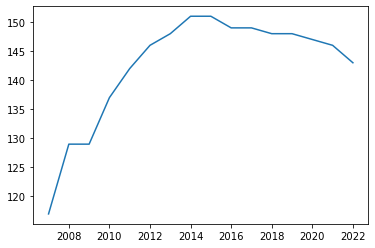

In [80]:
fig,ax = plt.subplots()
ax.plot(nga['year'],nga['rank']);

In [81]:
west_africa = ['Benin','Burkina Faso','Cape Verde','The Gambia','Ghana','Guinea','Guinea-Bissau','Liberia','Mali','Niger','Nigeria','Senegal','Sierra Leone','Togo']
west_afr = df3[df3['country'].isin(west_africa)]
west_afr.head()

,country,year,score,rank,continent
208,Benin,2022,2.12,105,Africa
209,Benin,2021,2.09,96,Africa
210,Benin,2020,2.18,106,Africa
211,Benin,2019,1.98,72,Africa
212,Benin,2018,1.97,69,Africa


In [82]:
# to build visualization with respect to world subregions
# scrape data for world subregion datasets
new_url = 'https://data.ipu.org/content/regional-groupings'
response = requests.get(new_url)
print(response.status_code)

200


In [83]:
soup = BeautifulSoup(response.text, 'html.parser')
subregions = soup.find('table', {'class':'ipu_report-countries-table sticky-enabled'})

In [84]:
df4 = pd.read_html(str(subregions))
df4 = pd.DataFrame(df4[0])
df4.head()

,Country,Region,Sub-region
0,Afghanistan,Asia,South Asia
1,Albania,Europe,Central and Eastern Europe
2,Algeria,Middle East and North Africa,North Africa
3,Andorra,Europe,Western Europe
4,Angola,Sub-Saharan Africa,Southern Africa


In [85]:
# examine the dataset
df4.tail()

,Country,Region,Sub-region
188,Venezuela (Bolivarian Republic of),Americas,South America
189,Viet Nam,Asia,South East Asia
190,Yemen,Middle East and North Africa,Middle East
191,Zambia,Sub-Saharan Africa,Southern Africa
192,Zimbabwe,Sub-Saharan Africa,Southern Africa


In [86]:
df4.sample(20)

,Country,Region,Sub-region
77,India,Asia,South Asia
139,Republic of Korea,Asia,East Asia
95,Lesotho,Sub-Saharan Africa,Southern Africa
113,Mongolia,Asia,East Asia
76,Iceland,Europe,Nordic countries
111,Micronesia (Federated States of),Pacific,Pacific Islands
24,Brunei Darussalam,Asia,South East Asia
191,Zambia,Sub-Saharan Africa,Southern Africa
20,Bolivia (Plurinational State of),Americas,South America
43,Czech Republic,Europe,Central and Eastern Europe


In [87]:
df4.columns = df4.columns.str.lower()

In [88]:
df4.columns

Index(['country', 'region', 'sub-region'], dtype='object')

In [89]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     193 non-null    object
 1   region      193 non-null    object
 2   sub-region  193 non-null    object
dtypes: object(3)
memory usage: 4.6+ KB


In [90]:
df3['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',

In [91]:
df3['country'].replace("Cote d'Ivoire","Côte d'Ivoire", inplace = True)

In [113]:
df3[df3['country']=='Taiwan']

,country,year,score,rank,continent
2240,Taiwan,2022,1.61,30,Asia
2241,Taiwan,2021,1.66,34,Asia
2242,Taiwan,2020,1.70,37,Asia
2243,Taiwan,2019,1.72,36,Asia
2244,Taiwan,2018,1.73,34,Asia
2245,Taiwan,2017,1.78,40,Asia
2246,Taiwan,2016,1.78,41,Asia
2247,Taiwan,2015,1.65,35,Asia
2248,Taiwan,2014,1.55,28,Asia
2249,Taiwan,2013,1.53,26,Asia


In [92]:
df4['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia (The)', 

In [93]:
df4['country'].replace(['Congo',"Democratic People's Republic of Korea",'Bolivia (Plurinational State of)','Gambia (The)','Iran (Islamic Republic of)','Kyrgyzstan',"Lao People's Democratic Republic",'Republic of Moldova','Russian Federation','Syrian Arab Republic','United Republic of Tanzania','Türkiye',"Republic of Korea",'United States of America','Venezuela (Bolivarian Republic of)','Viet Nam'],['Republic of the Congo','North Korea','Bolivia','The Gambia','Iran','Kyrgyz Republic','Laos','Moldova','Russia','Syria','Tanzania','Turkey','South Korea','United States','Venezuela','Vietnam'], inplace = True)

In [94]:
df4['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Republic of the Congo', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'North Korea',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'The Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Gr

In [95]:
my_df = df3.merge(df4,on ='country', how = 'left')

In [96]:
country = ['Republic of']

In [97]:
my_df[my_df['country']=='Russia']

,country,year,score,rank,continent,region,sub-region
1936,Russia,2022,3.27,160,Europe,Europe,Central and Eastern Europe
1937,Russia,2021,2.99,154,Europe,Europe,Central and Eastern Europe
1938,Russia,2020,3.04,154,Europe,Europe,Central and Eastern Europe
1939,Russia,2019,3.09,154,Europe,Europe,Central and Eastern Europe
1940,Russia,2018,3.16,154,Europe,Europe,Central and Eastern Europe
1941,Russia,2017,3.04,151,Europe,Europe,Central and Eastern Europe
1942,Russia,2016,3.07,151,Europe,Europe,Central and Eastern Europe
1943,Russia,2015,2.95,152,Europe,Europe,Central and Eastern Europe
1944,Russia,2014,3.03,152,Europe,Europe,Central and Eastern Europe
1945,Russia,2013,3.06,155,Europe,Europe,Central and Eastern Europe


In [98]:
my_df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',

In [99]:
region_null = my_df[my_df['region'].isnull()]

In [100]:
region_null['country'].value_counts()

Kosovo       16
Palestine    16
Taiwan       16
Name: country, dtype: int64

In [115]:
my_df[my_df['country']=='China']

,country,year,score,rank,continent,region,sub-region
448,China,2022,2.01,89,Asia,Asia,East Asia
449,China,2021,2.11,100,Asia,Asia,East Asia
450,China,2020,2.16,104,Asia,Asia,East Asia
451,China,2019,2.21,110,Asia,Asia,East Asia
452,China,2018,2.24,112,Asia,Asia,East Asia
453,China,2017,2.24,116,Asia,Asia,East Asia
454,China,2016,2.28,120,Asia,Asia,East Asia
455,China,2015,2.26,124,Asia,Asia,East Asia
456,China,2014,2.20,108,Asia,Asia,East Asia
457,China,2013,2.14,101,Asia,Asia,East Asia


In [117]:
taiwan = my_df[my_df['country']=='Taiwan']
taiwan['region'].fillna('Asia',inplace = True)
taiwan['sub-region'].fillna('East Asia', inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_17428\623600399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taiwan['region'].fillna('Asia',inplace = True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17428\623600399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taiwan['sub-region'].fillna('East Asia', inplace = True)


In [119]:
my_df[my_df['country']=='Taiwan'] = taiwan

In [120]:
my_df[my_df['country']=='Taiwan']

,country,year,score,rank,continent,region,sub-region
2240,Taiwan,2022,1.61,30,Asia,Asia,East Asia
2241,Taiwan,2021,1.66,34,Asia,Asia,East Asia
2242,Taiwan,2020,1.70,37,Asia,Asia,East Asia
2243,Taiwan,2019,1.72,36,Asia,Asia,East Asia
2244,Taiwan,2018,1.73,34,Asia,Asia,East Asia
2245,Taiwan,2017,1.78,40,Asia,Asia,East Asia
2246,Taiwan,2016,1.78,41,Asia,Asia,East Asia
2247,Taiwan,2015,1.65,35,Asia,Asia,East Asia
2248,Taiwan,2014,1.55,28,Asia,Asia,East Asia
2249,Taiwan,2013,1.53,26,Asia,Asia,East Asia


In [121]:
my_df[my_df['country']=='Russia']

,country,year,score,rank,continent,region,sub-region
1936,Russia,2022,3.27,160,Europe,Europe,Central and Eastern Europe
1937,Russia,2021,2.99,154,Europe,Europe,Central and Eastern Europe
1938,Russia,2020,3.04,154,Europe,Europe,Central and Eastern Europe
1939,Russia,2019,3.09,154,Europe,Europe,Central and Eastern Europe
1940,Russia,2018,3.16,154,Europe,Europe,Central and Eastern Europe
1941,Russia,2017,3.04,151,Europe,Europe,Central and Eastern Europe
1942,Russia,2016,3.07,151,Europe,Europe,Central and Eastern Europe
1943,Russia,2015,2.95,152,Europe,Europe,Central and Eastern Europe
1944,Russia,2014,3.03,152,Europe,Europe,Central and Eastern Europe
1945,Russia,2013,3.06,155,Europe,Europe,Central and Eastern Europe


In [122]:
kosovo = my_df[my_df['country']=='Kosovo']
kosovo['region'].fillna('Europe',inplace = True)
kosovo['sub-region'].fillna('Central and Eastern Europe', inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_17428\2214300676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kosovo['region'].fillna('Europe',inplace = True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17428\2214300676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kosovo['sub-region'].fillna('Central and Eastern Europe', inplace = True)


In [123]:
my_df[my_df['country']=='Kosovo']= kosovo

In [125]:
my_df[my_df['country']=='Israel']

,country,year,score,rank,continent,region,sub-region
1088,Israel,2022,2.57,134,Asia,Middle East and North Africa,Middle East
1089,Israel,2021,2.66,143,Asia,Middle East and North Africa,Middle East
1090,Israel,2020,2.77,145,Asia,Middle East and North Africa,Middle East
1091,Israel,2019,2.73,146,Asia,Middle East and North Africa,Middle East
1092,Israel,2018,2.76,146,Asia,Middle East and North Africa,Middle East
1093,Israel,2017,2.70,144,Asia,Middle East and North Africa,Middle East
1094,Israel,2016,2.65,144,Asia,Middle East and North Africa,Middle East
1095,Israel,2015,2.78,148,Asia,Middle East and North Africa,Middle East
1096,Israel,2014,2.68,149,Asia,Middle East and North Africa,Middle East
1097,Israel,2013,2.73,150,Asia,Middle East and North Africa,Middle East


In [127]:
palestine = my_df[my_df['country']=='Palestine']
palestine['region'].fillna('Middle East and North Africa',inplace = True)
palestine['sub-region'].fillna('Middle East', inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_17428\214446649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palestine['region'].fillna('Middle East and North Africa',inplace = True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17428\214446649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palestine['sub-region'].fillna('Middle East', inplace = True)


In [128]:
my_df[my_df['country']=='Palestine'] = palestine

In [132]:
# check for presence of null values in the region column
my_df['region'].isnull().sum()

0

In [133]:
# check for presence of null values in the sub region column
my_df['sub-region'].isnull().any()

False

In [110]:
my_df['continent'].isnull().sum()

0

In [101]:
my_df[my_df['country']=='North Korea']

,country,year,score,rank,continent,region,sub-region
1680,North Korea,2022,2.94,152,Asia,Asia,East Asia
1681,North Korea,2021,2.92,151,Asia,Asia,East Asia
1682,North Korea,2020,2.96,151,Asia,Asia,East Asia
1683,North Korea,2019,2.99,151,Asia,Asia,East Asia
1684,North Korea,2018,2.95,150,Asia,Asia,East Asia
1685,North Korea,2017,2.96,150,Asia,Asia,East Asia
1686,North Korea,2016,2.94,150,Asia,Asia,East Asia
1687,North Korea,2015,2.97,153,Asia,Asia,East Asia
1688,North Korea,2014,3.07,153,Asia,Asia,East Asia
1689,North Korea,2013,3.04,154,Asia,Asia,East Asia


In [137]:
my_df[my_df['country']=='Mauritania']

,country,year,score,rank,continent,region,sub-region
1424,Mauritania,2022,2.19,112,Africa,Middle East and North Africa,North Africa
1425,Mauritania,2021,2.29,118,Africa,Middle East and North Africa,North Africa
1426,Mauritania,2020,2.28,117,Africa,Middle East and North Africa,North Africa
1427,Mauritania,2019,2.33,122,Africa,Middle East and North Africa,North Africa
1428,Mauritania,2018,2.35,127,Africa,Middle East and North Africa,North Africa
1429,Mauritania,2017,2.35,128,Africa,Middle East and North Africa,North Africa
1430,Mauritania,2016,2.29,123,Africa,Middle East and North Africa,North Africa
1431,Mauritania,2015,2.26,122,Africa,Middle East and North Africa,North Africa
1432,Mauritania,2014,2.35,120,Africa,Middle East and North Africa,North Africa
1433,Mauritania,2013,2.32,122,Africa,Middle East and North Africa,North Africa


In [102]:
my_df['continent'].fillna('Africa',inplace = True)

In [135]:
# check for presence of null values in any of the columns
my_df.isnull().sum()

country       0
year          0
score         0
rank          0
continent     0
region        0
sub-region    0
dtype: int64

In [136]:
my_df.to_csv('my_project_data.csv')

In [104]:
df4.to_csv('regions.csv')